# Compute Architecure - Assessment
**Course**: TU 2025 25-26: 8645 -- COMPUTER INFRASTRUCTURE  
**Lecturer**: Ian McLauglin  
**Author**: Clyde Watts  








### Imports

yfinance - financial ticker data from yahoo  - [yfinance](https://github.com/ranaroussi/yfinance)
datetime - pythons inbuild date time
logging - python logging
os - operating system functions
glob - file selector

In [3]:

import logging
from datetime import datetime, timedelta
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf

##  Initialisation

In [4]:
# init logging
logging.basicConfig(level=logging.INFO)

In [5]:
# Delete all CSV files in the data directory
data_path = "./data/"
files = glob.glob(os.path.join(data_path, "*.csv"))
for f in files:
    print(f"Deleting file: {f}")
    os.remove(f)

Deleting file: ./data\20251020_215556.csv


## Problem 1: Data from yfinance

Using the [yfinance](https://github.com/ranaroussi/yfinance) Python package, write a function called `get_data()` that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

The function should save the data into a folder called `data` in the root of your repository using a filename with the format `YYYYMMDD-HHmmss.csv` where `YYYYMMDD` is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. `09` for September), followed by the two digit day, and `HHmmss` is hour, minutes, seconds.
Create the `data` folder if you don't already have one.

## Problem 1: Requirements ##

### Extract ###

1.  Extract from yfinance data the stock data for META,AAPL,AMZN,NFLX,GOOG
2.  For 5 complete previous days trading , we need to take into account that NASDAQ trades from Monday to Friday. If we go back 7 days we will always ignore weekends
3.  File format will YYYYMMDD-HHmmss.csv where YYYY - is 4 digit year , MM month 01-12 , DD - is 01-31. HH - hours , 24 our clock , mm - minutes 00-59 , seconds 00-59.
4.  Grain - Hour

Column
Date , <ticket> ( Open,High,Low,Close,Volume) ....
ticket is META , AAPL , AMZN , NFLX or GOOG
Open - open price
Close - close price
High - High pricr
Low - Low price
Volumn - Volume in period

The data frame return has an index on the date , and is a multilevel index. Level one is the ticket , and the second level is the metric - that is open , close , high , low prices and volume 
 

Todo:

1. Take Into account non-trading days as well as weekends - considered over engineering
1. Add a time column with EST instead of UCT.

In [6]:
# prototype for extracting stock data
tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]
def get_data(tickers = tickers,start_date=None, end_date=None,interval="1h",data_path="./data/"):
    """
    Function to get stock data from yfinance

    Parameters:
    tickers (list): List of stock tickers to download data for
    start_date (str): Start date for data in format "YYYY-MM-DD". If None, defaults to 6 days ago.
    end_date (str): End date for data in format "YYYY-MM-DD". If None, defaults to yesterday.
    interval (str): Data interval. Default is "1h".
    data_path (str): Path to save the data. Default is "./data/".
    Returns:
    df_data (DataFrame): DataFrame containing the stock data
    file_name (str): Name of the file where data is saved
    """
    ## TODO: start with the end date , and then go back 5 trading days to get the start date , if start_date is None
    # is not configured
    if start_date is None:
        # Variation of the fence posting to get last 7 days of data
        start_date = (datetime.now() - timedelta(days=7)).strftime("%Y-%m-%d")
        # create file name based on current date and time
        file_name = f"{data_path}{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
    else:
        # convert start_date to datetime object
        start_date_time = datetime.strptime(start_date, "%Y-%m-%d")
        # create file name based on start time and 23:59:59 of end date
        start_date_str = start_date_time.strftime("%Y%m%d") + "_235959"
        file_name = f"{data_path}{start_date_str}.csv"
    # if end_date is None , set to today - 0 days this means yesterday's data inclusive
    if end_date is None:
        end_date = (datetime.now() - timedelta(days=0)).strftime("%Y-%m-%d")
    else: # convert end_date to datetime object
        end_date_time = datetime.strptime(end_date, "%Y-%m-%d")
        # add 1 day to end_date to make it inclusive
        end_date = (end_date_time + timedelta(days=1)).strftime("%Y-%m-%d")
    # check if directory exists
    if not os.path.exists(data_path):
        logging.info(f"Creating directory: {data_path}")
        os.makedirs(data_path)
    # if file exists then delete it
    if os.path.exists(file_name):
        logging.info(f"Deleting existing file: {file_name}")
        os.remove(file_name)
    logging.info(f"Start Date: {start_date}, End Date: {end_date}")
    df_data = yf.download(tickers, interval=interval, group_by='ticker',start=start_date, end=end_date)
    # Save the data to a CSV file
    df_data.to_csv(file_name)
    return df_data
   



In [7]:
df = get_data(tickers=tickers)

INFO:root:Start Date: 2025-10-14, End Date: 2025-10-21
C:\Users\cw171001\AppData\Local\Temp\ipykernel_13400\558690274.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_data = yf.download(tickers, interval=interval, group_by='ticker',start=start_date, end=end_date)
C:\Users\cw171001\AppData\Local\Temp\ipykernel_13400\558690274.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_data = yf.download(tickers, interval=interval, group_by='ticker',start=start_date, end=end_date)
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


## Problem 2: Plotting Data

Write a function called `plot_data()` that opens the latest data file in the `data` folder and, on one plot, plots the `Close` prices for each of the five stocks.
The plot should include axis labels, a legend, and the date as a title.
The function should save the plot into a `plots` folder in the root of your repository using a filename in the format `YYYYMMDD-HHmmss.png`.
Create the `plots` folder if you don't already have one.

Requirements

1. Glob the data folder for YYYYMMDD_hhmmss.csv files. 
    1. We will glob the files looking for the pattern 20*.*csv
    1.

References

https://docs.python.org/3/library/glob.html


Clear Down Data before test

In [8]:
def get_the_latest_file(data_path="./data/"):
    """get_the_latest_file

    Args:
        data_path (str): The path to the directory containing the data files.

    Returns:
        str: The path to the latest data file, or None if no files are found.
    """

    logging.info(f"Getting the latest file from {data_path}")
    # File pattern
    file_pattern = "20[0-9][0-9][0-1][0-9][0-3][0-9]_[0-9][0-9][0-9][0-9][0-9][0-9].csv"
    # Add path to file pattern
    file_pattern = os.path.join(data_path, file_pattern)
    list_of_files = glob.glob(file_pattern) 
    if not list_of_files:
        logging.warning(f"No files found in {data_path} matching pattern {file_pattern}")
        return None
    latest_file = max(list_of_files, key=os.path.getctime)
    logging.info(f"Latest file: {latest_file}")
    return latest_file

### Load data from 

In [9]:
file = get_the_latest_file()
print(file)


INFO:root:Getting the latest file from ./data/
INFO:root:Latest file: ./data\20251021_080647.csv
INFO:root:Latest file: ./data\20251021_080647.csv


./data\20251021_080647.csv


In [10]:
def load_file_into_dataframe(file):
    """load_file_into_dataframe

    Args:
        file (str): The path to the data file.

    Returns:
        pd.DataFrame: The data as a pandas DataFrame.
    """
    if file is None:
        logging.error("No file provided to load into dataframe.")
        return None
    df = pd.read_csv(file, header=[0,1], index_col=0, parse_dates=True)
    return df



In [11]:
print("Loading data from the latest file...")
file = get_the_latest_file()
full_file_name = os.path.abspath(file)
print(f"Loading data from file: {full_file_name}")

df = load_file_into_dataframe(file)
print("File Loaded Successfully")
print(df.shape)

INFO:root:Getting the latest file from ./data/
INFO:root:Latest file: ./data\20251021_080647.csv
INFO:root:Latest file: ./data\20251021_080647.csv


Loading data from the latest file...
Loading data from file: c:\Users\cw171001\OneDrive - Teradata\Documents\GitHub\PFDA_computer_architecture\data\20251021_080647.csv
File Loaded Successfully
(35, 25)


### Investigate Data Frame

Have a look at the dataframe and see it's structure. 

https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download

The index is DatetimeIndex - that is the timestamp of the price.
The data appears Company/Ticker - and then metrics - open,high,low,close,volume



In [12]:
# Have a look at the index and columns
print(" Data Frame Info")
print(df.info(verbose=True))
#print(df.columns)

 Data Frame Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2025-10-14 13:30:00+00:00 to 2025-10-20 19:30:00+00:00
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (META, Open)    35 non-null     float64
 1   (META, High)    35 non-null     float64
 2   (META, Low)     35 non-null     float64
 3   (META, Close)   35 non-null     float64
 4   (META, Volume)  35 non-null     int64  
 5   (AAPL, Open)    35 non-null     float64
 6   (AAPL, High)    35 non-null     float64
 7   (AAPL, Low)     35 non-null     float64
 8   (AAPL, Close)   35 non-null     float64
 9   (AAPL, Volume)  35 non-null     int64  
 10  (NFLX, Open)    35 non-null     float64
 11  (NFLX, High)    35 non-null     float64
 12  (NFLX, Low)     35 non-null     float64
 13  (NFLX, Close)   35 non-null     float64
 14  (NFLX, Volume)  35 non-null     int64  
 15  (AMZN, Open)    35 non-null     float64
 16  (AMZN, High)   

Check the first and last dates . To check if the week is being covered.
That is the fense post problem

In [13]:
# Only get the datetime index and convert to a list
datetime_index = df.index.to_series().reset_index(drop=True)
#print("Datetime Index:")
#print(datetime_index.tolist())
# Convert series datetime to dates and remove duplicates and sort
date_list = datetime_index.dt.date.drop_duplicates().sort_values().astype(str)
print(date_list)

0     2025-10-14
7     2025-10-15
14    2025-10-16
21    2025-10-17
28    2025-10-20
Name: Datetime, dtype: object


Investigate the time zones , the data is from US NASDAQ - Monday to Friday 9:30 to 21:30 EST , UTC+8

https://www.ig.com/en/trading-strategies/nasdaq-opening-and-closing-times--when-can-you-trade--230527#:~:text=The%20index%20opens%20at%209.30,that's%204%20am%20UTC%2B8.&text=However%2C%20you%20can%20trade%20the,a%20day%2C%20Monday%20to%20Thursday.

In [18]:
# Only get the datetime index and convert to a list
datetime_index = df.index.to_series().reset_index(drop=True)
# Extract the time zone info
time_zone = datetime_index.dt.tz
print(f"Time Zone Info: {time_zone}")
# Extract time from datetime index
time_list = datetime_index.dt.time.drop_duplicates().sort_values().astype(str)
print("Time List:")
print(time_list)
# see if the convert the timezone to EST for NASDAQ data is possible
datetime_index_est = datetime_index.dt.tz_convert('US/Eastern')
print("Datetime Index in EST:")
time_list_est = datetime_index_est.dt.time.drop_duplicates().sort_values().astype(str)
print("Time List in EST:")
print(time_list_est)

Time Zone Info: UTC
Time List:
0    13:30:00
1    14:30:00
2    15:30:00
3    16:30:00
4    17:30:00
5    18:30:00
6    19:30:00
Name: Datetime, dtype: object
Datetime Index in EST:
Time List in EST:
0    09:30:00
1    10:30:00
2    11:30:00
3    12:30:00
4    13:30:00
5    14:30:00
6    15:30:00
Name: Datetime, dtype: object


INFO:root:Getting the latest file from ./data/
INFO:root:Latest file: ./data\20251020_215556.csv
INFO:root:Loading data from file: ./data\20251020_215556.csv
INFO:root:Latest file: ./data\20251020_215556.csv
INFO:root:Loading data from file: ./data\20251020_215556.csv


The latest file name is: ./data\20251020_215556.csv
Filename only: 20251020_215556.csv
Filename without extension: 20251020_215556
PNG Filename: 20251020_215556.png
PNG File Path: ./data/20251020_215556.png


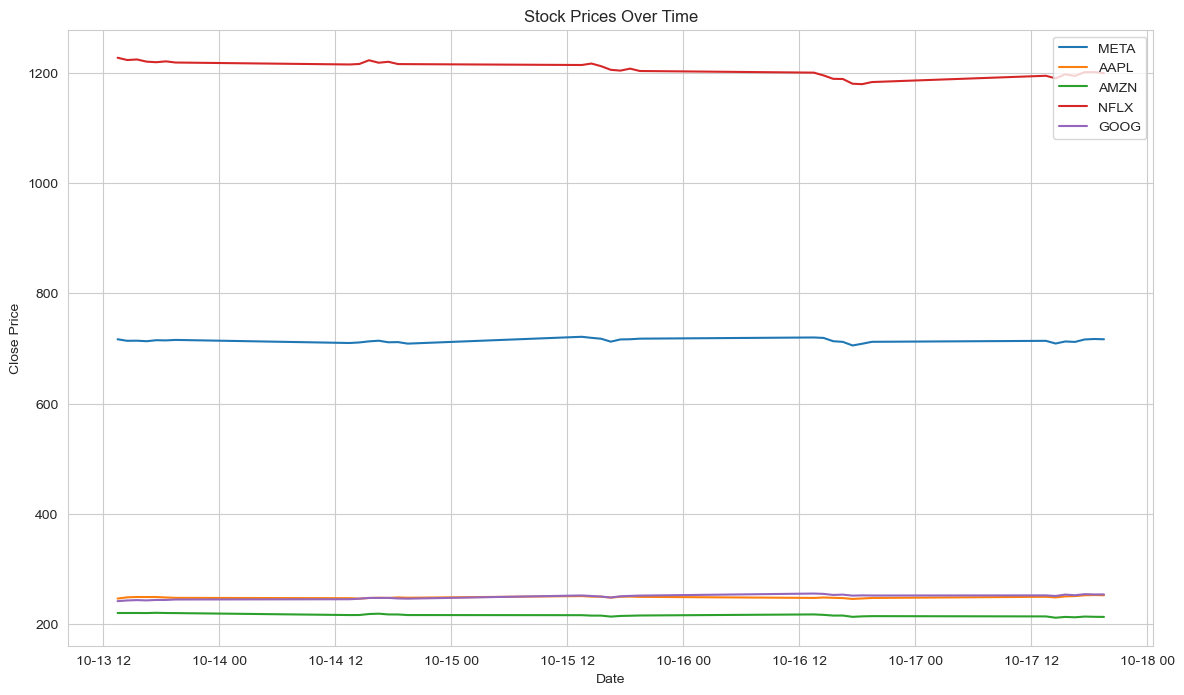

In [165]:
### Attempt to do plot and write to file

# Look for latest file
latest_csv_filename = get_the_latest_file()
print("The latest file name is:", latest_csv_filename)
logging.info(f"Loading data from file: {latest_csv_filename}")
# pull the date and timestamp out of file name
filename_only = os.path.basename(latest_csv_filename)  # get filename without path
print("Filename only:", filename_only)
# remove file extension from filename - in this case .csv
filename_no_ext = os.path.splitext(filename_only)[0]
print("Filename without extension:", filename_no_ext)
# create png filename 
filename_png = filename_no_ext + ".png"
print("PNG Filename:", filename_png)
df = load_file_into_dataframe(latest_csv_filename)
data_path = "./data/"
# create full path for png file
png_file_path = os.path.join(data_path, filename_png)
print("PNG File Path:", png_file_path)
plt.figure(figsize=(14, 8))
for ticker in tickers:
    plt.plot(df.index, df[(ticker, 'Close')], label=ticker)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Prices Over Time')
plt.legend()
#plt.show()
plt.savefig(png_file_path)

In [166]:
def plot_data(df, png_file_path):
    """plot_data

    Args:
        df (pd.DataFrame): The data as a pandas DataFrame.
        png_file_path (str): The path to save the plot image.

    Returns:
        None
    """
    if df is None or png_file_path is None:
        logging.error("DataFrame or PNG file path is None.")
        return
    plt.figure(figsize=(14, 8))
    for ticker in tickers:
        plt.plot(df.index, df[(ticker, 'Close')], label=ticker)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Stock Prices Over Time')
    plt.legend()
    plt.savefig(png_file_path)
    logging.info(f"Plot saved to {png_file_path}")

INFO:root:Plot saved to ./data/20251020_215556.png


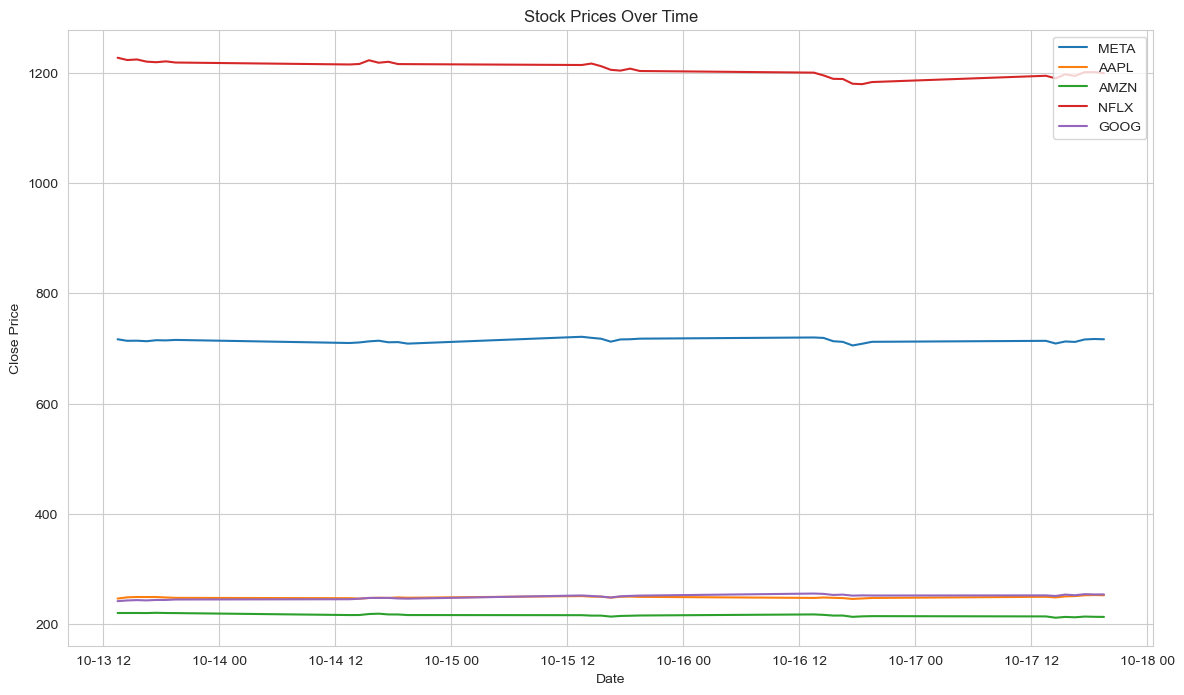

In [167]:
plot_data(df, png_file_path)
#------------------------------------------------------------------------------


Try alternatives to plotting data 


In [168]:

# Look for latest file
latest_csv_filename = get_the_latest_file()
print("The latest file name is:", latest_csv_filename)
logging.info(f"Loading data from file: {latest_csv_filename}")
# pull the date and timestamp out of file name
filename_only = os.path.basename(latest_csv_filename)  # get filename without path
print("Filename only:", filename_only)
# remove file extension from filename - in this case .csv
filename_no_ext = os.path.splitext(filename_only)[0]
print("Filename without extension:", filename_no_ext)
# create png filename 
filename_png = filename_no_ext + ".png"
print("PNG Filename:", filename_png)
df = load_file_into_dataframe(latest_csv_filename)
df

INFO:root:Getting the latest file from ./data/
INFO:root:Latest file: ./data\20251020_215556.csv
INFO:root:Loading data from file: ./data\20251020_215556.csv
INFO:root:Latest file: ./data\20251020_215556.csv
INFO:root:Loading data from file: ./data\20251020_215556.csv


The latest file name is: ./data\20251020_215556.csv
Filename only: 20251020_215556.csv
Filename without extension: 20251020_215556
PNG Filename: 20251020_215556.png


Ticker                           AMZN                                      \
Price                            Open        High         Low       Close   
Datetime                                                                    
2025-10-13 13:30:00+00:00  217.699997  220.429993  217.039993  220.110001   
2025-10-13 14:30:00+00:00  220.100006  220.539993  218.690002  220.160004   
2025-10-13 15:30:00+00:00  220.169800  220.669998  219.899994  220.169998   
2025-10-13 16:30:00+00:00  220.169998  220.589996  219.860504  220.050003   
2025-10-13 17:30:00+00:00  220.050003  220.570007  219.690094  220.524994   
2025-10-13 18:30:00+00:00  220.524994  220.639999  219.800003  220.119995   
2025-10-13 19:30:00+00:00  220.110001  220.559998  219.940002  220.000000   
2025-10-14 13:30:00+00:00  215.399994  216.600006  212.600006  216.425003   
2025-10-14 14:30:00+00:00  216.425003  217.069595  215.979996  216.494995   
2025-10-14 15:30:00+00:00  216.494995  218.499893  216.470001  218.300003   
2025-10-14 16:30:00+00:00  218.289993  219.320007  218.039993  218.919998   
2025-10-14 17:30:00+00:00  218.925003  219.059998  216.820007  217.559998   
2025-10-14 18:30:00+00:00  217.570007  217.735001  216.873398  217.485001   
2025-10-14 19:30:00+00:00  217.490005  217.520004  215.369995  216.440002   
2025-10-15 13:30:00+00:00  216.699997  217.710007  215.910095  216.199997   
2025-10-15 14:30:00+00:00  216.220001  216.740005  215.149994  215.440002   
2025-10-15 15:30:00+00:00  215.449997  215.699997  214.149994  215.420105   
2025-10-15 16:30:00+00:00  215.460007  215.539993  212.660004  213.615005   
2025-10-15 17:30:00+00:00  213.634995  215.000000  213.470001  214.800003   
2025-10-15 18:30:00+00:00  214.780106  215.274994  214.589996  215.181000   
2025-10-15 19:30:00+00:00  215.184998  215.649994  214.720001  215.630005   
2025-10-16 13:30:00+00:00  215.669998  218.589996  215.289993  217.574997   
2025-10-16 14:30:00+00:00  217.597000  218.535004  216.515305  216.759995   
2025-10-16 15:30:00+00:00  216.750000  217.039993  215.430099  215.500000   
2025-10-16 16:30:00+00:00  215.500000  215.860001  213.880005  215.529999   
2025-10-16 17:30:00+00:00  215.509995  215.759995  213.139999  213.179993   
2025-10-16 18:30:00+00:00  213.199997  214.869995  212.810104  214.070007   
2025-10-16 19:30:00+00:00  214.100006  215.000000  213.639999  214.470001   
2025-10-17 13:30:00+00:00  214.559998  214.800003  212.619995  213.960007   
2025-10-17 14:30:00+00:00  213.964996  213.964996  211.119995  211.589996   
2025-10-17 15:30:00+00:00  211.595001  213.240005  211.029999  213.059998   
2025-10-17 16:30:00+00:00  213.044998  213.288605  212.119995  212.366394   
2025-10-17 17:30:00+00:00  212.335007  213.789993  212.054993  213.684998   
2025-10-17 18:30:00+00:00  213.679993  213.764999  212.940002  213.259995   
2025-10-17 19:30:00+00:00  213.250000  213.380005  212.779999  213.050003   

Ticker                                     GOOG                          \
Price                        Volume        Open        High         Low   
Datetime                                                                  
2025-10-13 13:30:00+00:00  11916565  240.970001  243.179993  240.750000   
2025-10-13 14:30:00+00:00   5313426  241.585007  243.259995  240.910004   
2025-10-13 15:30:00+00:00   3478186  242.899994  243.800003  242.729996   
2025-10-13 16:30:00+00:00   2850696  243.500000  243.820007  242.544998   
2025-10-13 17:30:00+00:00   2655303  243.009995  244.039993  242.899994   
2025-10-13 18:30:00+00:00   2489006  243.820007  244.009995  243.250000   
2025-10-13 19:30:00+00:00   3852204  243.809998  244.990005  243.789993   
2025-10-14 13:30:00+00:00  13903268  241.860001  245.240005  241.177505   
2025-10-14 14:30:00+00:00   5601692  245.080002  246.600006  244.830597   
2025-10-14 15:30:00+00:00   3960722  246.149994  248.024002  246.149994   
2025-10-14 16:30:00+00:00   3463725  247.500000  247.895004  246.636795   
2025-10-14 17:30:00+00:

PNG File Path: ./data/20251020_215556.png


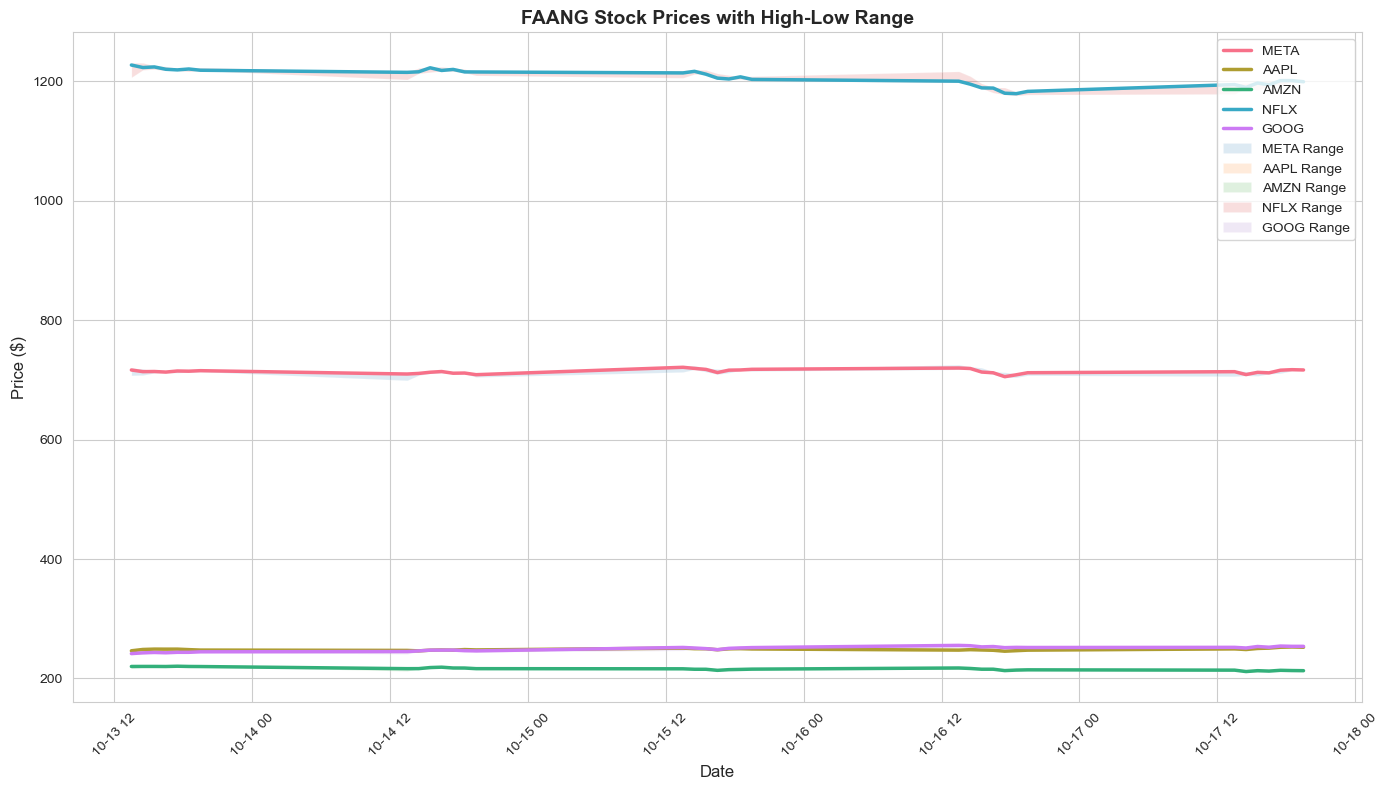

In [169]:
print("PNG File Path:", png_file_path)

# Prepare data for seaborn plotting - reshape for long format
plot_data = []
for ticker in tickers:
    ticker_data = pd.DataFrame({
        'Date': df.index,
        'Close': df[(ticker, 'Close')].values,
        'High': df[(ticker, 'High')].values,
        'Low': df[(ticker, 'Low')].values,
        'Ticker': ticker
    })
    plot_data.append(ticker_data)

# Combine all ticker data
combined_data = pd.concat(plot_data, ignore_index=True)

# Create seaborn plot with proper styling
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plot close prices using seaborn
sns.lineplot(data=combined_data, x='Date', y='Close', hue='Ticker', 
             palette='husl', linewidth=2.5)

# Add shaded areas for high-low ranges
for ticker in tickers:
    ticker_subset = combined_data[combined_data['Ticker'] == ticker]
    plt.fill_between(ticker_subset['Date'], 
                     ticker_subset['High'], 
                     ticker_subset['Low'], 
                     alpha=0.15, 
                     label=f'{ticker} Range')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('FAANG Stock Prices with High-Low Range', fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()
plt.savefig(png_file_path, dpi=300, bbox_inches='tight')

In [170]:
# Data is already in the right format - combined_data has Date, Close, High, Low, Ticker
# Now normalize the price data to 0-1 range for each ticker individually
normalized_data = combined_data.copy()

# Normalize each ticker separately
for ticker in tickers:
    ticker_mask = normalized_data['Ticker'] == ticker
    for column in ['Close', 'High', 'Low']:
        ticker_values = normalized_data.loc[ticker_mask, column]
        min_val = ticker_values.min()
        max_val = ticker_values.max()
        normalized_data.loc[ticker_mask, column] = (ticker_values - min_val) / (max_val - min_val)

print("Normalized data (first 10 rows):")
print(normalized_data.head(10))

Normalized data (first 10 rows):
                       Date     Close      High       Low Ticker
0 2025-10-13 13:30:00+00:00  0.712490  0.629754  0.431084   META
1 2025-10-13 14:30:00+00:00  0.535215  0.528018  0.453839   META
2 2025-10-13 15:30:00+00:00  0.550464  0.283523  0.642117   META
3 2025-10-13 16:30:00+00:00  0.489151  0.292863  0.664901   META
4 2025-10-13 17:30:00+00:00  0.605141  0.332888  0.662350   META
5 2025-10-13 18:30:00+00:00  0.583823  0.331553  0.700728   META
6 2025-10-13 19:30:00+00:00  0.638213  0.366912  0.755707   META
7 2025-10-14 13:30:00+00:00  0.283477  0.032688  0.000000   META
8 2025-10-14 14:30:00+00:00  0.346507  0.109228  0.441907   META
9 2025-10-14 15:30:00+00:00  0.472312  0.336223  0.594657   META


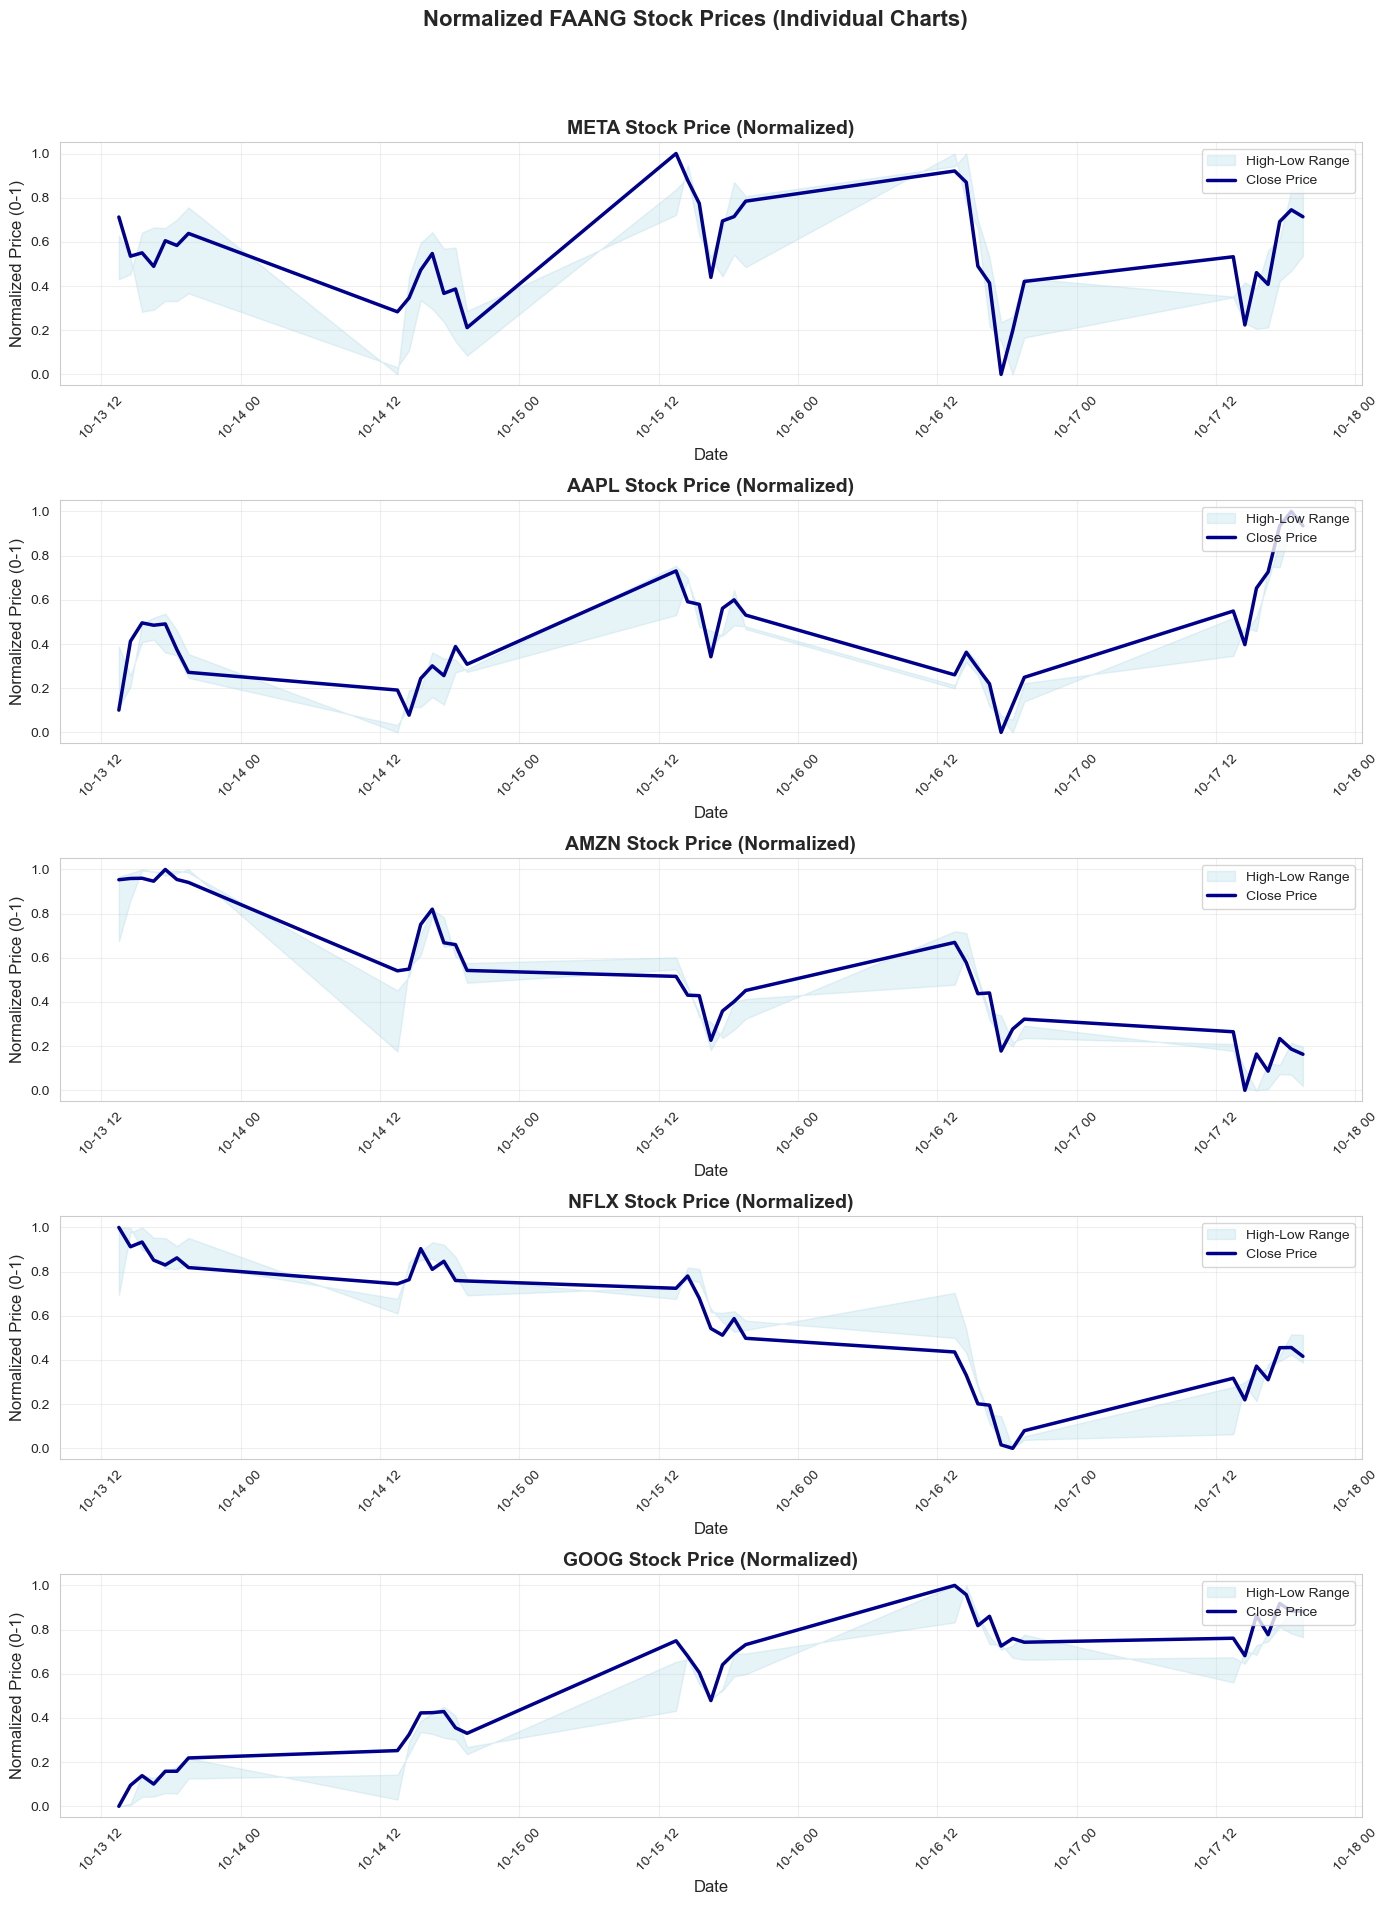

Normalized individual plots saved to: ./data/20251020_215556_normalized_individual.png


<Figure size 640x480 with 0 Axes>

In [171]:
# Create separate plots for each ticker using normalized data
# Note: This was all done using vibe coding using vscode and github copilot
fig, axes = plt.subplots(len(tickers), 1, figsize=(14, 4 * len(tickers)))
fig.suptitle('Normalized FAANG Stock Prices (Individual Charts)', fontsize=16, fontweight='bold', y=0.98)

for i, ticker in enumerate(tickers):
    # Filter data for current ticker
    ticker_data = normalized_data[normalized_data['Ticker'] == ticker].copy()
    ticker_data = ticker_data.sort_values('Date')
    
    ax = axes[i]
    
    # Plot shaded area between high and low
    ax.fill_between(ticker_data['Date'], 
                   ticker_data['High'], 
                   ticker_data['Low'], 
                   alpha=0.3, 
                   color='lightblue',
                   label='High-Low Range')
    
    # Plot close price line
    sns.lineplot(data=ticker_data, x='Date', y='Close', 
                ax=ax, color='darkblue', linewidth=2.5, label='Close Price')
    
    ax.set_title(f'{ticker} Stock Price (Normalized)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Normalized Price (0-1)', fontsize=12)
    ax.legend(loc='upper right')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Save the plot
normalized_png_path = png_file_path.replace('.png', '_normalized_individual.png')
plt.savefig(normalized_png_path, dpi=300, bbox_inches='tight')
print(f"Normalized individual plots saved to: {normalized_png_path}")